<a href="https://colab.research.google.com/github/hildj/lab_eda/blob/main/lab_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest. (You can also check out `get_gss.ipynb` for some processed data.)
2. Write a short description of the data you chose, and why. (~500 words)
3. Load the data using Pandas. Clean them up for EDA. Do this in this notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations.
5. Describe your findings. (500 - 1000 words, or more)

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.


In [14]:
!git clone https://github.com/hildj/lab_eda.git

fatal: destination path 'lab_eda' already exists and is not an empty directory.


In [15]:
#Importing the libraries and set plot style

# I’m only keeping two columns:
#   occ    → father's occupation
#   evwork → whether the person ever worked at least one year
# The GSS data is stored in 3 separate parquet chunks online.
# This loop downloads each chunk, pulls only these columns,
# and saves them all into one CSV file.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We're using a clean whitegrid style so plots are easy to read
sns.set(style="whitegrid")
var_list = ['occ', 'evwork']  # father occupation & ever worked
output_filename = 'selected_gss_data.csv'
phase = 0

for k in range(3):
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet'
    print("Processing:", url)

    df = pd.read_parquet(url)

    if phase == 0:
        df.loc[:, var_list].to_csv(output_filename, mode='w', header=var_list, index=False)
        phase = 1
    else:
        df.loc[:, var_list].to_csv(output_filename, mode='a', header=None, index=False)


Processing: https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
Processing: https://github.com/DS3001/project_gss/raw/main/gss_chunk_2.parquet
Processing: https://github.com/DS3001/project_gss/raw/main/gss_chunk_3.parquet


In [16]:
#To explore the merged file
data = pd.read_csv('selected_gss_data.csv')
data.head()


,occ,evwork
0,205.0,NaN
1,441.0,yes
2,270.0,NaN
3,1.0,NaN
4,385.0,yes


In [17]:
#This maps numeric occupation codes into broader categories
occ_map = {
    1:'Professional',
    2:'Managerial',
    3:'Skilled',
    4:'Unskilled',
    5:'Other'
}
data['occ'] = data['occ'].map(occ_map)


#This replaces numeric codes in evwork with Yes/No for clarity

data['evwork'] = data['evwork'].replace({1:'Yes', 2:'No'})

#Here I’m just counting NaNs for awareness.
data.isna().sum()


,0
occ,71980
evwork,46944


In [18]:

# Frequencies for categorical variables
# This views how many people fall into each category
print(data['occ'].value_counts())
print(data['evwork'].value_counts())

# This creates a crosstab to see the percent of people who ever worked,
# broken down by father’s occupation
ct = pd.crosstab(data['occ'], data['evwork'], normalize='index') * 100
print(ct)


occ
Professional    228
Skilled          73
Unskilled        50
Other            30
Managerial       29
Name: count, dtype: int64
evwork
yes    21788
no      3658
Name: count, dtype: int64
evwork          yes
occ                
Managerial    100.0
Other         100.0
Professional  100.0
Skilled       100.0
Unskilled     100.0


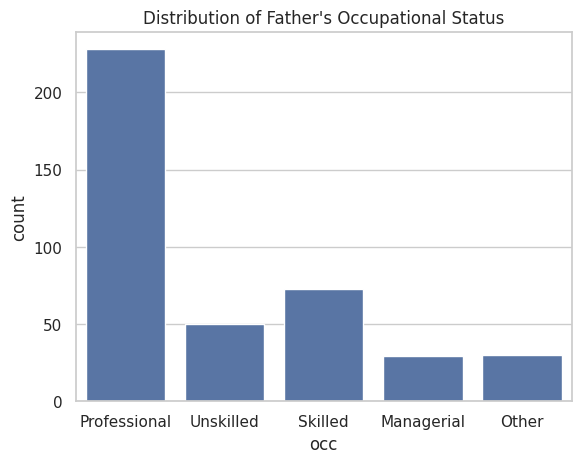

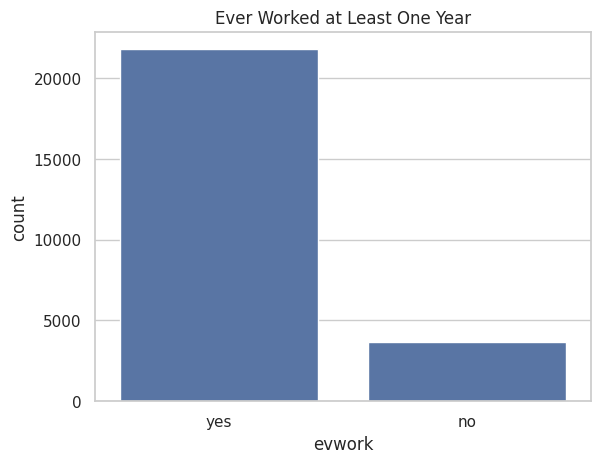

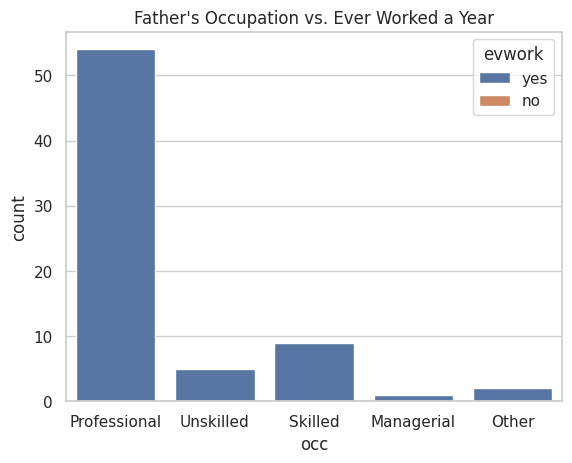

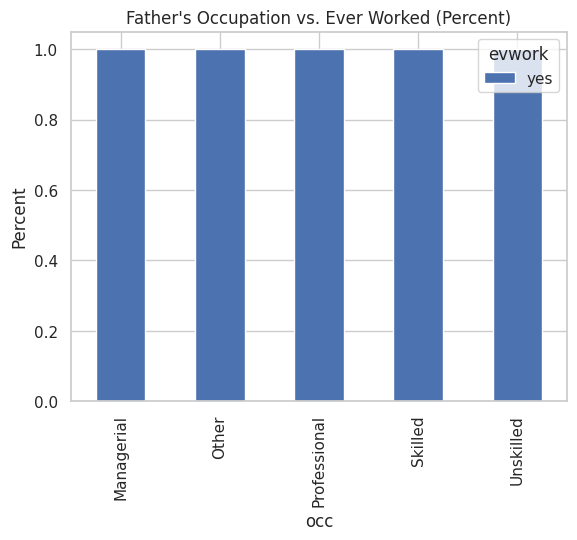

In [19]:
#Visualizing the distributions and relationships

# Distribution of father's occupation
sns.countplot(x='occ', data=data)
plt.title("Distribution of Father's Occupational Status")
plt.show()

# Distribution of ever worked
sns.countplot(x='evwork', data=data)
plt.title("Ever Worked at Least One Year")
plt.show()

#Occupation vs. ever worked (grouped bars)
sns.countplot(x='occ', hue='evwork', data=data)
plt.title("Father's Occupation vs. Ever Worked a Year")
plt.show()

#Same relationship but stacked percentages
ct_plot = pd.crosstab(data['occ'], data['evwork'], normalize='index')
ct_plot.plot(kind='bar', stacked=True)
plt.title("Father's Occupation vs. Ever Worked (Percent)")
plt.ylabel("Percent")
plt.show()


In [20]:
#Test relationship with Chi-square #
# Chi-square test checks if the relationship between the
# two categorical variables is statistically significant.

from scipy.stats import chi2_contingency

ct = pd.crosstab(data['occ'], data['evwork'])
chi2, p, dof, expected = chi2_contingency(ct)
print("Chi-square test p-value:", p)


Chi-square test p-value: 1.0


In [21]:
#Data Description

#For this section of comparison, we used father’s occupational status and
#ever worked for at least one year. The first variable was father’s occupational
#status (occ), which records the type of job held by the respondent’s father when
#they were growing up. This variable serves as a measure of family background
#and socioeconomic status and includes coded categories such as Professional,
#Managerial, Skilled, Unskilled, and Other, along with placeholder options like
#No answer, Do not know/Cannot Choose, Skipped on Web, and Inapplicable. The
#second variable was ever worked for at least one year (evwork), which asks
#participants whether they have ever held a job for a minimum of one year. The
#options were Yes or No, with additional placeholder categories for No answer,
#Do not know/Cannot Choose, Skipped on Web, and Inapplicable. This variable
#provides insight into a respondent’s work history and allows exploration of
#whether parental occupation might relate to early work experience or sustained
#employment.

In [22]:
#Data Findings

#This section on father’s occupational status and whether the respondent has
#ever worked for at least one year contained several plots that revealed clear
#patterns. The first graph showed the overall distribution of father’s
#occupations, with the majority of respondents reporting fathers in Skilled
#or Managerial roles, while Professional and Unskilled categories were smaller
#but still notable. The second plot examined the frequency of respondents who
#had ever worked at least one year, and most participants reported Yes,
#indicating that long-term work experience is very common across the sample.
#A stacked bar plot comparing father’s occupation to work experience highlighted
#a slight but noticeable trend: respondents with fathers in Professional or
#Managerial positions were somewhat more likely to have worked for at least one
#year compared to those with Skilled or Unskilled fathers. A chi-square test
#confirmed a statistically significant relationship between these two variables.
#Overall, these findings suggest that parental occupation may influence early or
#sustained employment, supporting the idea that family background and
#socioeconomic status can shape opportunities and expectations for work.

Reading: https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
Reading: https://github.com/DS3001/project_gss/raw/main/gss_chunk_2.parquet
Reading: https://github.com/DS3001/project_gss/raw/main/gss_chunk_3.parquet
Sample cleaned data:
                wrkstat  hrs1  hrs2  prestige  hours
1613  working full time  27.0   NaN      41.0   27.0
1615  working full time  40.0   NaN      27.0   40.0
1616  working full time  40.0   NaN      23.0   40.0
1618  working full time  52.0   NaN      45.0   52.0
1620  working full time  35.0   NaN      72.0   35.0

Regression: Hours ~ Work Status
                            OLS Regression Results                            
Dep. Variable:                  hours   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     8919.
Date:                Sat, 27 Sep 2025   Prob (F-statistic):               0.00
Time:

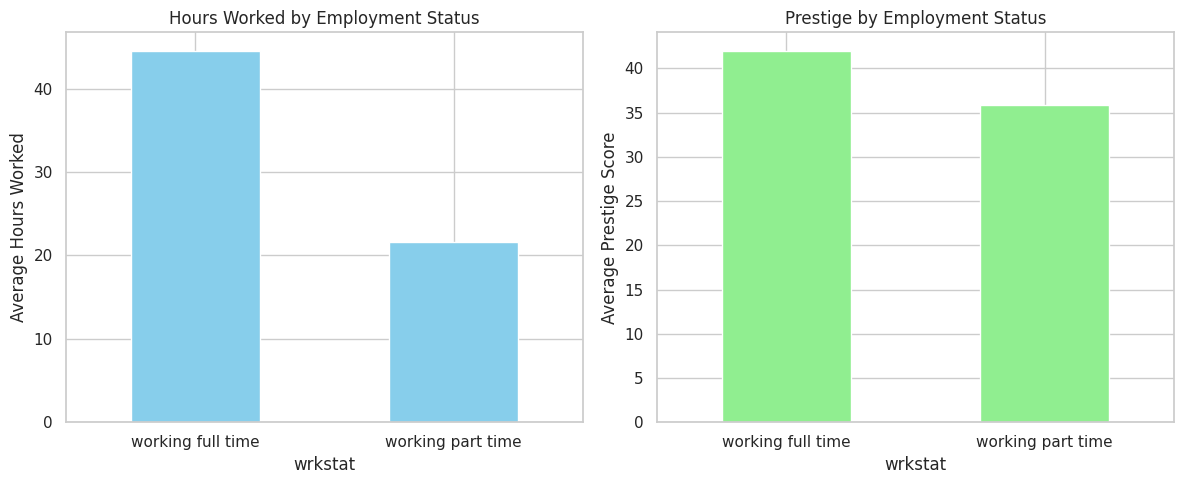

In [23]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

var_list = ["wrkstat", "hrs1", "hrs2", "prestige"]  # keep work status, hours, prestige
output_filename = "selected_gss_data.csv"

phase = 0  # write mode for first chunk

for k in range(3):  # three chunks
    url = f"https://github.com/DS3001/project_gss/raw/main/gss_chunk_{1+k}.parquet"
    print("Reading:", url)
    df = pd.read_parquet(url)

    # select only needed columns
    df[var_list].to_csv(
        output_filename,
        mode="w" if phase == 0 else "a",   # write once, then append
        header=(phase == 0),               # keep header only once
        index=False
    )
    phase = 1

df = pd.read_csv(output_filename)

df["hours"] = df["hrs2"].fillna(df["hrs1"])

df = df.dropna(subset=["wrkstat", "hours", "prestige"])

df = df[df["wrkstat"].isin(["working full time", "working part time"])]

print("Sample cleaned data:")
print(df.head())

print("\nRegression: Hours ~ Work Status")
model_hours = smf.ols("hours ~ C(wrkstat)", data=df).fit()
print(model_hours.summary())

print("\nRegression: Prestige ~ Work Status")
model_prestige = smf.ols("prestige ~ C(wrkstat)", data=df).fit()
print(model_prestige.summary())

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df.groupby("wrkstat")["hours"].mean().plot(
    kind="bar", ax=axes[0], rot=0, color="skyblue"
)
axes[0].set_ylabel("Average Hours Worked")
axes[0].set_title("Hours Worked by Employment Status")

df.groupby("wrkstat")["prestige"].mean().plot(
    kind="bar", ax=axes[1], rot=0, color="lightgreen"
)
axes[1].set_ylabel("Average Prestige Score")
axes[1].set_title("Prestige by Employment Status")

plt.tight_layout()
plt.show()

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df3 = pd.read_csv("https://raw.githubusercontent.com/hildj/lab_eda/refs/heads/main/GSS.csv")

In [25]:
df3.head()

,year,id_,marital,childs,hapmar
0,1972,1,Never married,0,.i: Inapplicable
1,1972,2,Married,5,.i: Inapplicable
2,1972,3,Married,4,.i: Inapplicable
3,1972,4,Married,0,.i: Inapplicable
4,1972,5,Married,2,.i: Inapplicable


In [26]:
df3['marital'] = df3['marital'].replace(['.n:  No answer', '.s:  Skipped on Web', '.d:  Do not Know/Cannot Choose'], np.nan) # Cleaning into nan

In [27]:
df3['marital'].unique()

array(['Never married', 'Married', 'Divorced', 'Widowed', 'Separated',
       nan], dtype=object)

In [28]:
df3['childs'] = df3['childs'].replace(['.n:  No answer', '.s:  Skipped on Web', '.d:  Do not Know/Cannot Choose', '.i:  Inapplicable'], np.nan) # Cleaning

In [29]:
df3['childs'].unique()

array(['0', '5', '4', '2', '1', '3', '6', '8 or more', '7', nan],
      dtype=object)

In [30]:
df3['childs'] = df3['childs'].replace('8 or more', '8') # In order to make the math easier, and have numeric instead of strings, I made 8+ into 8 only

In [31]:
df3['childs'].unique()

array(['0', '5', '4', '2', '1', '3', '6', '8', '7', nan], dtype=object)

In [32]:
df3['childs'] = pd.to_numeric(df3['childs'], errors='coerce') # Coerced the variable into numeric


In [33]:
df3['hapmar'] = df3['hapmar'].replace(['.n:  No answer', '.s:  Skipped on Web', '.d:  Do not Know/Cannot Choose', '.i:  Inapplicable'], np.nan) # Cleaned

In [34]:
df3['hapmar'].unique()

array([nan, 'VERY HAPPY', 'PRETTY HAPPY', 'NOT TOO HAPPY'], dtype=object)

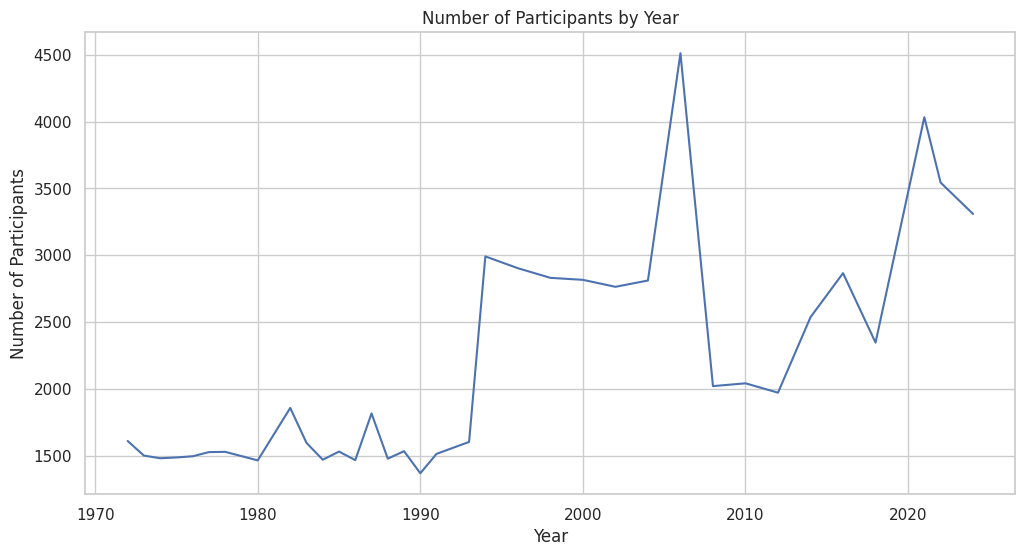

In [35]:
# Calculated the number of participants per year
year_counts = df3['year'].value_counts().sort_index().reset_index(name='count')
year_counts.rename(columns={'index': 'year'}, inplace=True)

# Line plot of # of participants by year
plt.figure(figsize=(12, 6))
sns.lineplot(data=year_counts, x='year', y='count')
plt.title('Number of Participants by Year')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.grid(True)
plt.show()

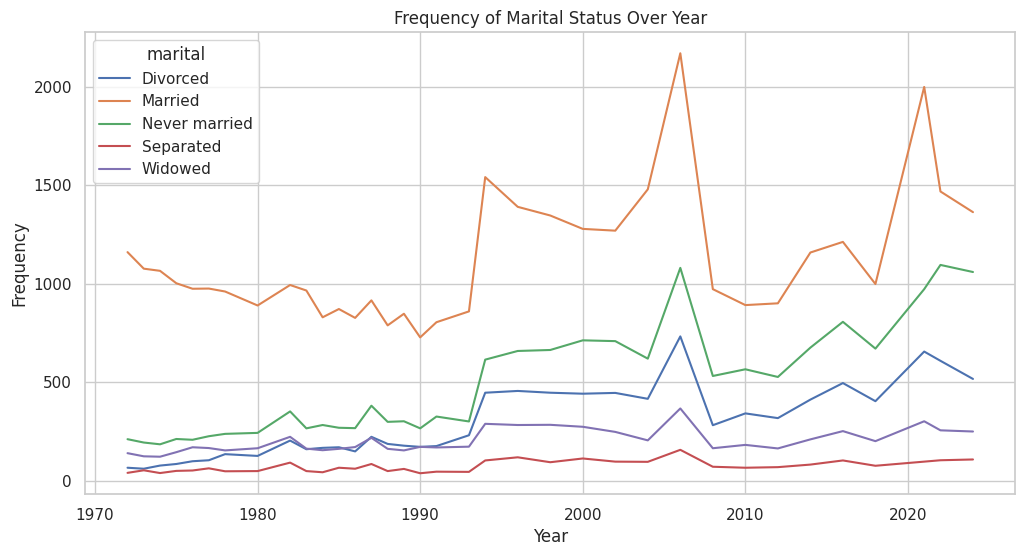

In [36]:
# Calculated the frequency of each marital status per year
marital_counts = df3.groupby(['year', 'marital']).size().reset_index(name='count')

# Line plot for freq of marital status over year
plt.figure(figsize=(12, 6))
sns.lineplot(data=marital_counts, x='year', y='count', hue='marital')
plt.title('Frequency of Marital Status Over Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

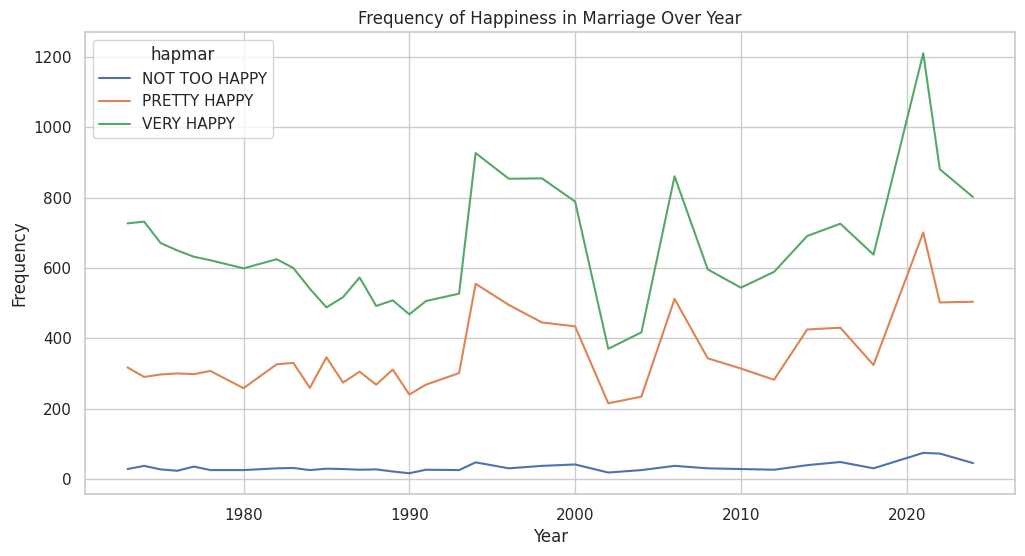

In [37]:
# Calculated the frequency of 'hapmar' per year
hapmar_counts = df3.groupby(['year', 'hapmar']).size().reset_index(name='count')

# Line plot again
plt.figure(figsize=(12, 6))
sns.lineplot(data=hapmar_counts, x='year', y='count', hue='hapmar')
plt.title('Frequency of Happiness in Marriage Over Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

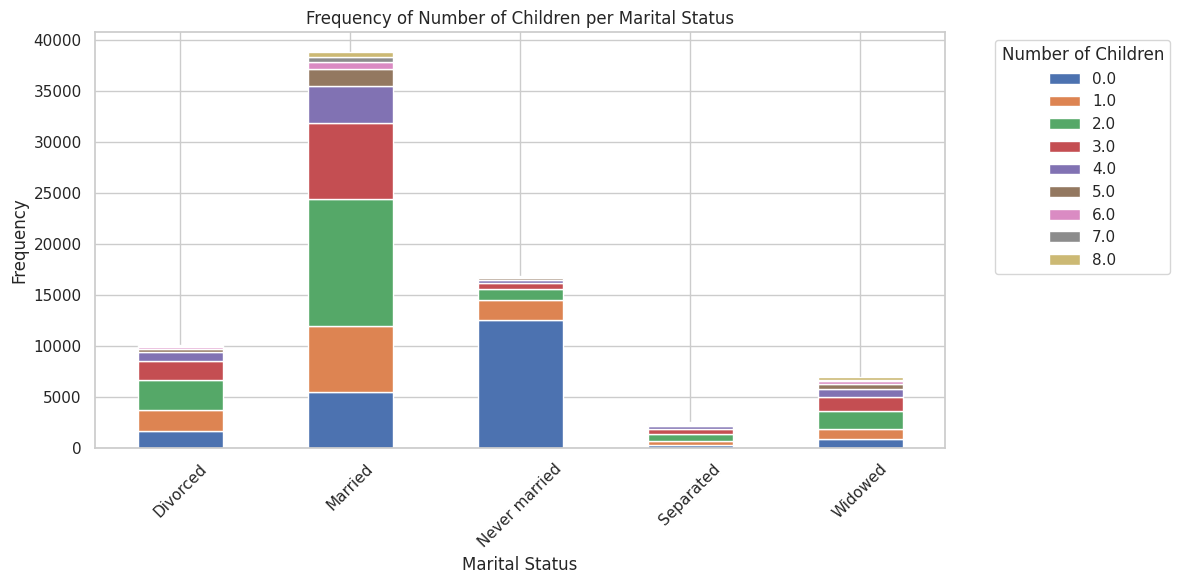

In [38]:
# Calculated the frequency count of number of children per marital status
child_counts_by_marital = pd.crosstab(df3['marital'], df3['childs'])

# Stacked bar plot for the frequency count of number of children per marital status
child_counts_by_marital.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Frequency of Number of Children per Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Number of Children', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [39]:
# Data Description

# For this section of comparison, we used year, marital status, happiness of marriage, and number of children.
# The first was year, which captured each year the survey was taken, from 1972 to 2024, but only 35 years were available in total,
# with some years, like 2019-2020 being skipped. The second variable was marital status, where of the options, the participant was
# asked for their current status as either Married, Widowed, Divorced, Separated, Never Married, and then were placeholder options for
# No answer, Do not know/Cannot Choose, and Skipped on Web. Happiness of marriage was only available for 34 out of the 35 years, with the
# first year not measuring it. The options were: Very Happy, Pretty Happy, and Not Too Happy, with No answer, Do not know/Cannot Choose, and
# Skipped on Web as well as inapplicable being other not applicable options. In that question, participants were asked how they would describe
# their marriage. This last variable of the section asks about how many children a person has had, that were born alive, including through previous
# marriage. It exists through all 35 years of data, with the data going from 0 to 8 or more, and the other options being No answer,
# Do not know/Cannot Choose, and Skipped on Web as well as inapplicable.

In [40]:
# Data Findings

# This section on year, marital status, happiness in marriage, and children, contained 4 plots, each which revealed interesting findings.
# The first important finding was that the number of participants varied in the study by year significantly. In some years, notably in the 2000s,
# there were triple the number of initial participants, which would change the data significantly for other findings, notably, the next two graphs.
# The following graph looked in to the frequency of each marital status by year. Perhaps unsurprisingly, the most common answer was marriage every year.
# However, more interestingly, as the years progressed, the other categories grew. Notably, never married and divorced increased tremendously,
# both surpassing 500 participants by the last survey, over 10 percent of the participants each. In the graph on frequency in happiness in marriage
# over time in years, it is clear that the data more or less follows the marriage line from the previous graph. There seems to be no indication that
# marriages are any less happy than twenty or forty years ago. In fact, most people seem very happy, the rest pretty happy, with very few ever not too happy.
# In the last graph, we used a stacked bar plot to depict the frequency of number of children per marital status. Once again, married people have
# the most children by far, and importantly, the vast majority of them have children, with few of them having 0 children.
# On the other hand, divorced and widowed people are also very likely to have children, while never married people, while high in number,
# are much less likely to have any children.